In [ ]:
from math import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

matplotlib.rcParams['axes.labelsize'] = 15

def plotsol(t,y):
    fig, ax = plt.subplots(2, 1, sharex= True, figsize = (8,5), dpi = 150, tight_layout = True)
    ax[0].set_ylabel(r"$\dot R$ [m/s]")
    ax[1].set(ylabel = r"$R$ [mm]", xlabel = "$t$ [s]")
    
    ax[0].plot(t, y[0])
    ax[1].plot(t, y[1]*1000)

    ax[0].set(xlim = (t[0], t[-1]))
    ax[1].set_ylim(bottom = 0)

In [3]:
patm        = 98000     # Pascals
T_amb       = 293       # Kelvin
nR          = 5E-8   # n (moles) * R (cte gases)

A           = 2
w           = 2*pi * 1

rho_agua    = 1000      # kg/m^3
viscosidad  = 0.01      # Pa*s == kg/s
s_sup       = 7.274E-2  # N/m

In [4]:
def ps(t, w, d = 0):
    return A * sin(t*w + d)

def step_B(t, a, b):
    return -3/2 * b*b/a                         \
    + (
        3/4 * nR * T_amb / (pi*a*a*a)
        - (2*s_sup + 4*viscosidad*b)/a
        - patm #- ps(t, w)
    ) /rho_agua                      

In [18]:
delta_t = 1E-8
steps   = int(1E7)
a, b = [5E-4], [0] # m , m/s

for step in range(1, steps):
    bnew = step_B(step*delta_t, a[step - 1], b[step - 1])*delta_t + b[step - 1]
    anew = bnew*delta_t + a[step - 1]

    a.append(anew)
    b.append(bnew)

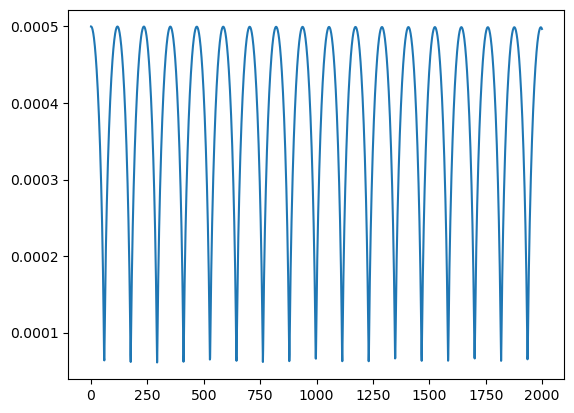

In [19]:
plt.plot(a[::5000])

In [5]:
def fun(t,y):
    b,a = y
    return -3/2 * b*b/a                         \
    + (
        3/4 * nR * T_amb / (pi*a*a*a)
        - (2*s_sup + 4*viscosidad*b)/a
        - patm #- ps(t, w)
    ) /rho_agua , b  

The solver successfully reached the end of the integration interval.


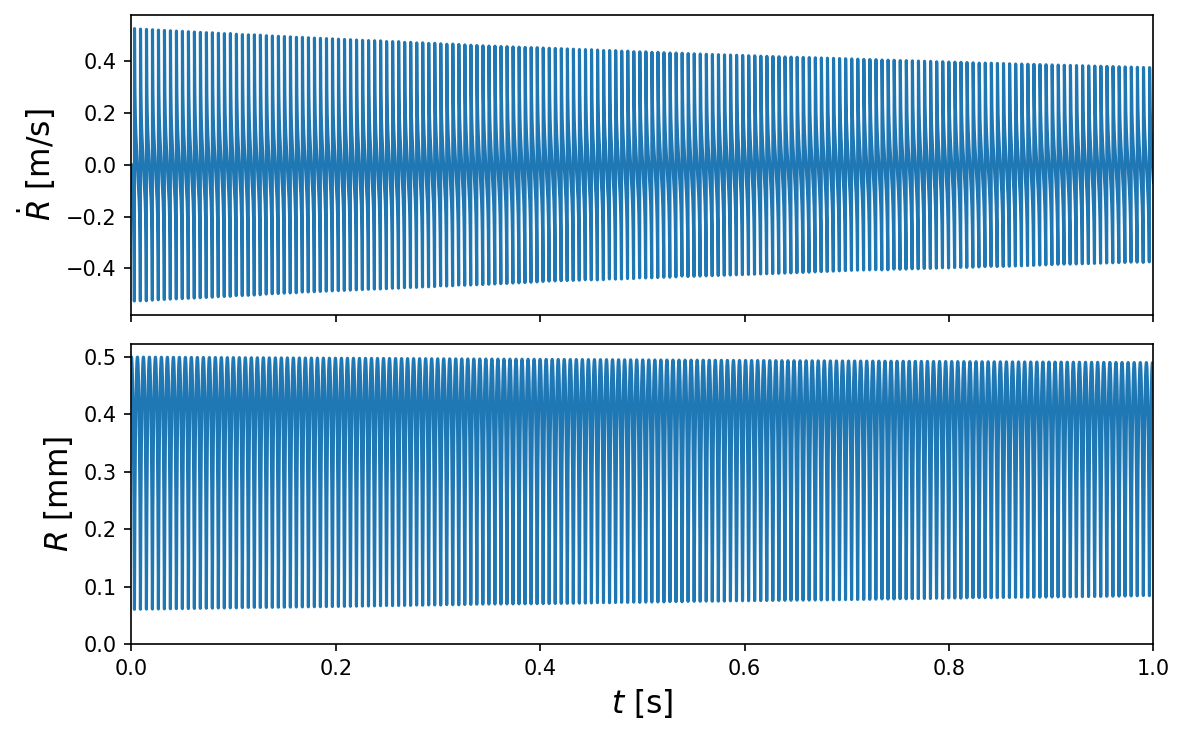

In [81]:
y0 = [0,5E-4] # m/s , m
sol = solve_ivp(fun, (0., 1), y0, first_step = 1E-8, max_step = 1E-4, rtol = 1E-10, dense_output = True)
print(sol.message)
plotsol(sol.t,sol.y)